# Gaussian Bandits
    Matt Shumway
    Winter 2025

## Overview
To get the ball rolling on the Bayesian Bandits project, let's start with some simple, non-Bayesian baselines. Our setup for this will be to have $n=10$ arms, each with a mean reward probability $p_i \sim \text{Uniform}(0, 1)$. Given selection of arm $i$, you receive a reward of $1$ with probability $p_i$, and a reward of $0$ with probability $1 - p_i$.

## Baselines

### Random Exploration
The most näive approach, the bandit draws a random arm at a given time step.

### $\epsilon$-greedy
Let $\epsilon \in (0, 1)$. Then at each time step step, we draw $u \sim \text{Uniform}(0, 1)$. If $u \leq \epsilon$, then we randomly choose an action. Otherwise, we exploit what we know and choose the arm with the highest expected reward.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Best arm index: 2 with probability 0.93
Mean reward probability across all arms: 0.51


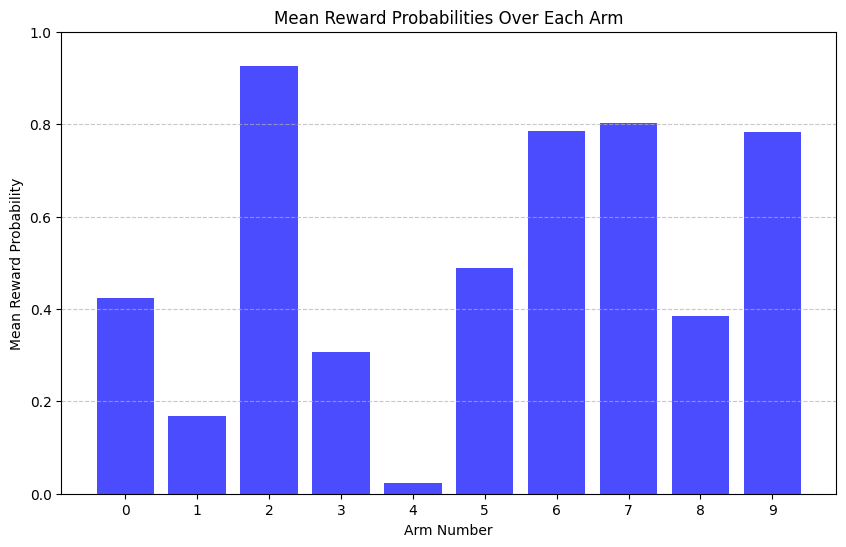

In [14]:
num_arms = 10

reward_probs = np.random.uniform(size=num_arms)

best_arm_idx = np.argmax(reward_probs)
print(f"Best arm index: {best_arm_idx} with probability {reward_probs[best_arm_idx]:.2f}")

mean_reward_prob = np.mean(reward_probs)
print(f"Mean reward probability across all arms: {mean_reward_prob:.2f}")

plt.figure(figsize=(10, 6))
plt.title("Mean Reward Probabilities Over Each Arm")
plt.bar(range(num_arms), reward_probs, color='blue', alpha=0.7)
plt.xlabel("Arm Number")
plt.ylabel("Mean Reward Probability")
plt.xticks(range(num_arms))
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

### Random Exploration Bandit

In [17]:
class MultiArmedBandit:
    def __init__(self, num_arms, reward_probs):
        self.num_arms = num_arms
        self.reward_probs = reward_probs

    def run_iteration(self, iters, time_steps):
        reward_hists = []
        explored_cnts = []

        for t in range(iters):
            reward_hist, explored_cnt = self.run_episode(time_steps)
            reward_hists.append(reward_hist)
            explored_cnts.append(explored_cnt)
        
        # Compute average statistics
        avg_reward = np.mean(reward_hists, axis=0)
        std_reward = np.std(reward_hists, axis=0)
        avg_explored = np.mean(explored_cnts, axis=0)
        return avg_reward, std_reward, avg_explored
    
    def run_episode(self, time_steps):
        rewards = []
        explored_cnt = np.zeros(self.num_arms)

        for t in range(time_steps):
            arm, reward = self.step()
            rewards.append(reward)
            explored_cnt[arm] += 1
        
        return np.array(rewards), explored_cnt

    def step(self):
        arm = np.random.randint(0, self.num_arms)
        reward = np.random.binomial(1, self.reward_probs[arm])
        return arm, reward

    def plot_results(self, avg_reward, std_reward, avg_explored):
        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        plt.title("Average Reward Over Time")
        plt.plot(avg_reward, label='Avg Reward', color='green')
        plt.fill_between(range(len(avg_reward)), avg_reward - std_reward, avg_reward + std_reward, color='green', alpha=0.2)
        plt.axhline(np.mean(avg_reward), color='red', linestyle='--', label='Mean Reward')
        print(f"Mean Reward: {np.mean(avg_reward):.2f} ± {np.std(avg_reward):.2f}")
        plt.xlabel("Time Steps")
        plt.ylabel("Average Reward")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.title("Avg. Explored Trial Counts")
        plt.bar(range(self.num_arms), avg_explored, color='orange', alpha=0.7)
        plt.xlabel("Arm Number")
        plt.ylabel("Average Explored Count")
        plt.xticks(range(self.num_arms))
        plt.ylim(0, np.max(avg_explored) + 1)

        plt.tight_layout()
        plt.show()

Mean Reward: 0.51 ± 0.02


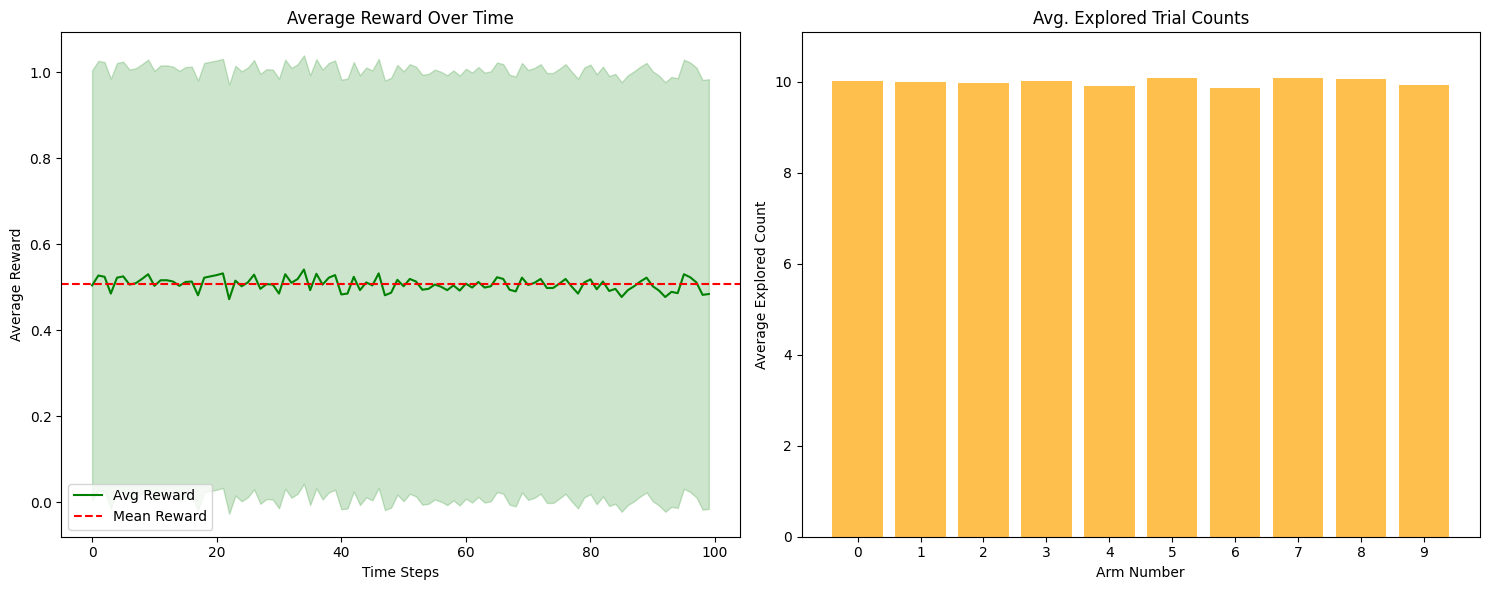

In [20]:
rand_bandit = MultiArmedBandit(num_arms, reward_probs)
iters = 1000
time_steps = 100
avg_reward, std_reward, avg_explored = rand_bandit.run_iteration(iters, time_steps)
rand_bandit.plot_results(avg_reward, std_reward, avg_explored)

### $\epsilon$-greedy Bandit